In [1]:
import sys
sys.path.append('/Users/albertsmith/Documents/GitHub/')
sys.path.append('/Users/albertsmith/Documents/GitHub.nosync/')
import SLEEPY as sl
import numpy as np
import matplotlib.pyplot as plt
sl.Defaults['parallel']=False
plt.rcParams.update({'font.size': 14})

ipwd=26

In [2]:
%matplotlib notebook

# Decoupling

In [3]:
# For 15N detection, with powder average
ex=sl.ExpSys(850,Nucs=['15N','1H'],vr=0,pwdavg=sl.PowderAvg('zcw4180'))
ex.set_inter('dipole',delta=22000,i0=0,i1=1)
L=sl.Liouvillian(ex)

seq=L.Sequence()
seq.add_channel('1H',t=[0,1/5000/8],v1=0)

rho=sl.Rho(rho0='15Nx',detect='15Np')

In [4]:
rho.DetProp(seq,n=4096)

Density Matrix/Detection Operator
rho0: 15Nx
detect[0]: 15Np
Current time is 102400.000 microseconds
4096 time points have been recorded


<IPython.core.display.Javascript object>


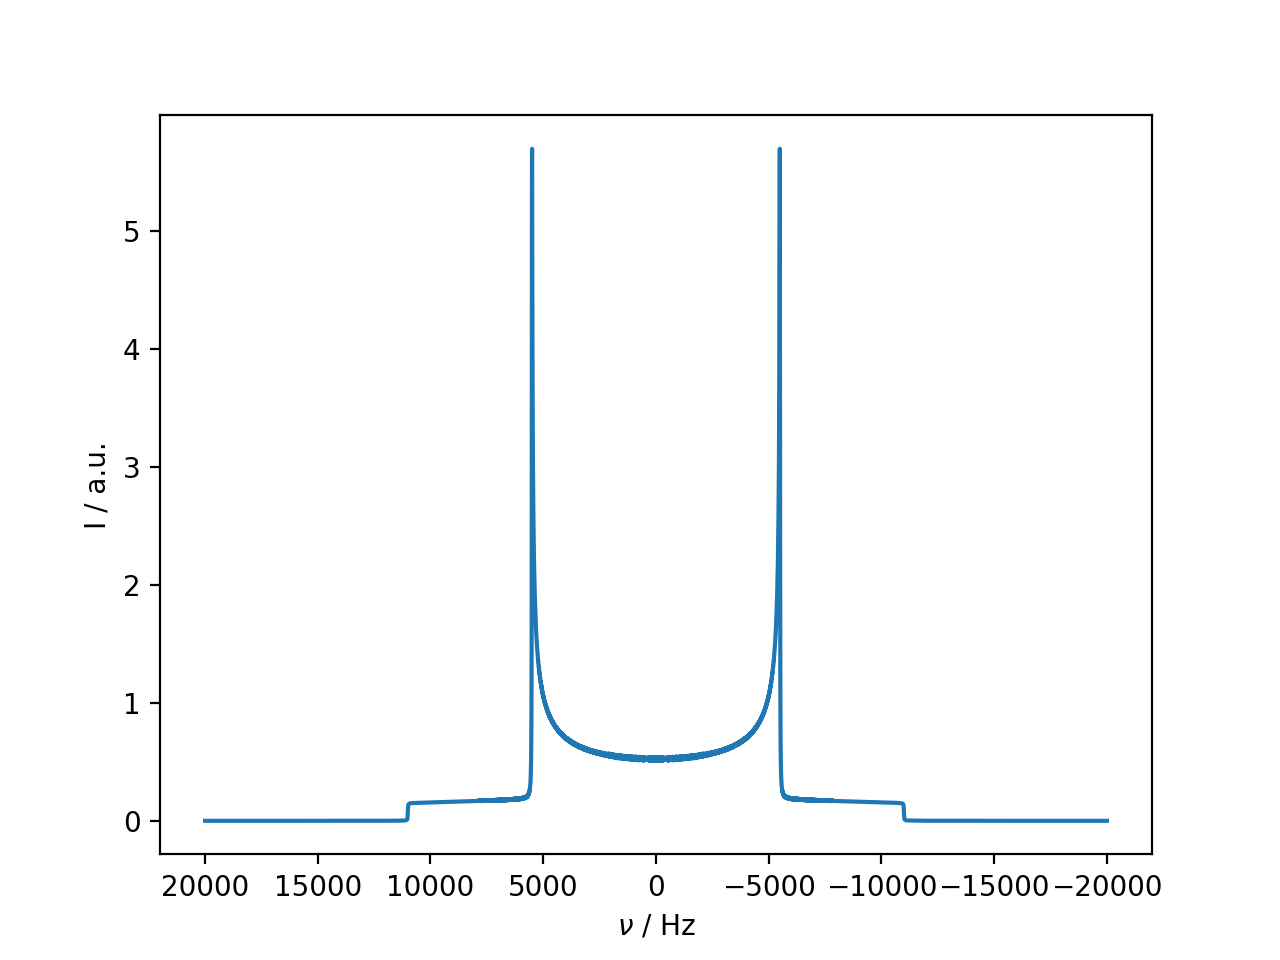

<AxesSubplot:xlabel='$\\nu$ / Hz', ylabel='I / a.u.'>

In [5]:
rho.plot(FT=True,apodize=True)

In [6]:
ex=sl.ExpSys(850,Nucs=['15N','1H','1H'],vr=5000,pwdavg=sl.PowderAvg(q=2),n_gamma=48)
ex.set_inter('dipole',delta=22000,i0=0,i1=1)
ex.set_inter('dipole',delta=50000,i0=1,i1=2,euler=[0,np.pi/3,0])
L=sl.Liouvillian(ex)

v1=60000
dt=1/v1/4
seq=L.Sequence()
seq.add_channel('1H',t=[0,L.taur/8],v1=0,phase=0,voff=0)

rho=sl.Rho(rho0='15Nx',detect='15Np')

In [7]:
rho.DetProp(seq,n=4096)

Prop: 8 steps per every 1 rotor period


Density Matrix/Detection Operator
rho0: 15Nx
detect[0]: 15Np
Current time is 102400.000 microseconds
4096 time points have been recorded


<IPython.core.display.Javascript object>


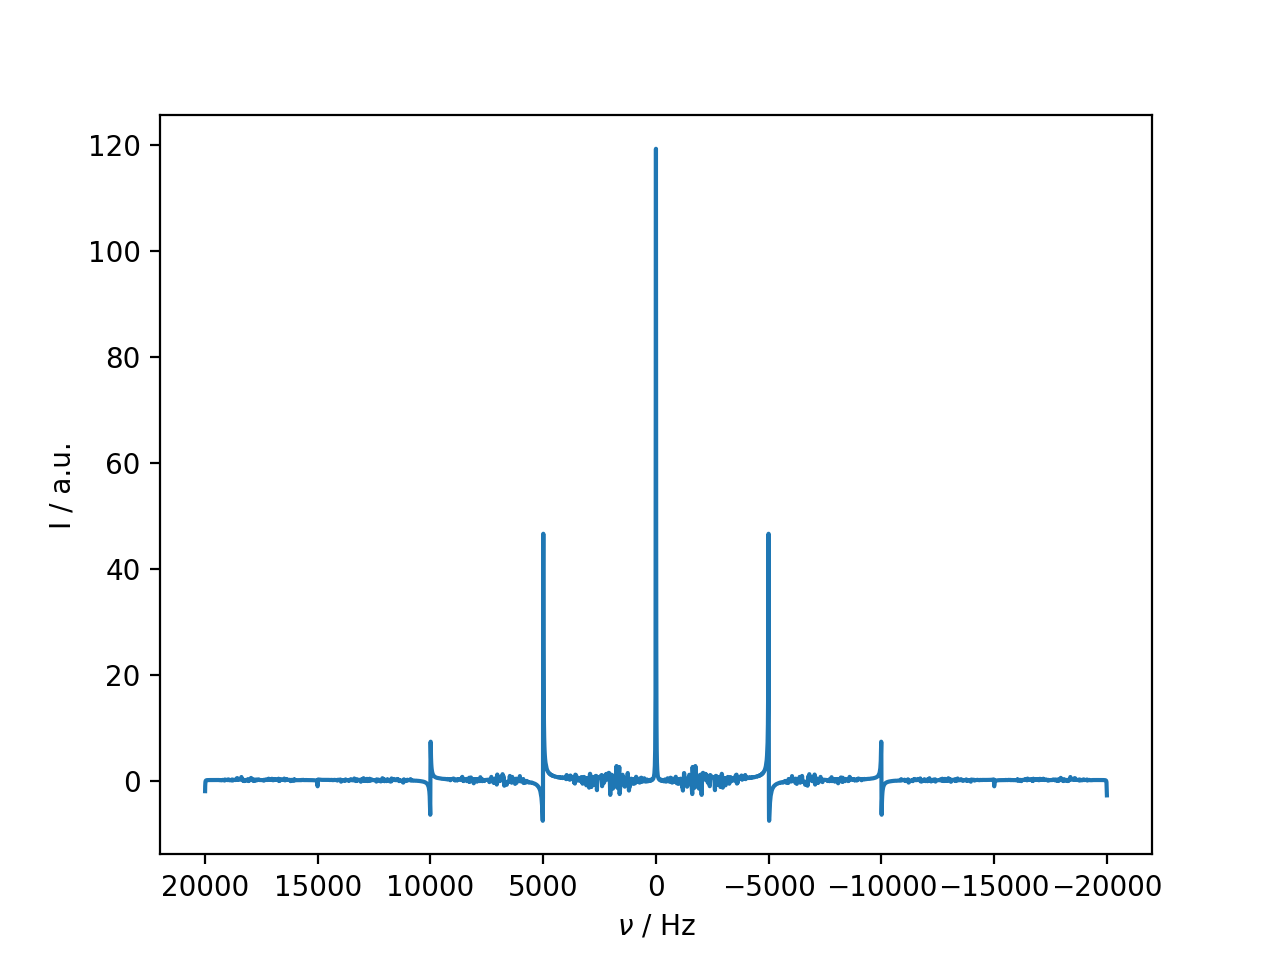

<AxesSubplot:xlabel='$\\nu$ / Hz', ylabel='I / a.u.'>

In [8]:
rho.plot(FT=True,apodize=True)

We start with a simple, two-spin ($^{15}$N, $^1$H) system with a dipole coupling between the spins, under 5 kHz MAS. We will investigate the appearance of  the $^{15}$N spectra (powder averaged), and also the behavior of individual $^1$H nuclei (single crystal), to attempt to understand the simulation behavior. We'll build  two spin-systems for this purpose.

In [114]:
# For 15N detection, with powder average
ex=sl.ExpSys(850,Nucs=['15N','1H'],vr=5000,pwdavg=sl.PowderAvg(q=2),n_gamma=48)
ex.set_inter('dipole',delta=22000,i0=0,i1=1)
L=sl.Liouvillian(ex)

seq=L.Sequence()
seq.add_channel('1H',t=[0,ex.taur/8],v1=0)

rho=sl.Rho(rho0='15Nx',detect='15Np')

In [55]:
rho.DetProp(seq,n=4096)

Prop: 8 steps per every 1 rotor period


Density Matrix/Detection Operator
rho0: 15Nx
detect[0]: 15Np
Current time is 102400.000 microseconds
4096 time points have been recorded


<AxesSubplot:xlabel='$\\nu$ / Hz', ylabel='I / a.u.'>

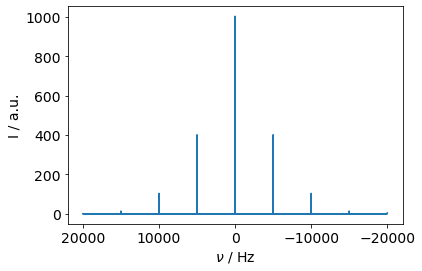

In [56]:
rho.plot(FT=True)

As expected, we see considerable broadening and sidebands.

Since the coupling is ~10 kHz, it should be possible to remove with a relatively moderate field. We start with continuous-wave (cw) decoupling.

In [55]:
seq.add_channel('1H',t=[0,ex.taur/8],v1=20000)
rho.clear()
rho.DetProp(seq=seq,n=4096)

Prop: 8 steps per every 1 rotor period


Density Matrix/Detection Operator
rho0: 15Nx
detect[0]: 15Np
Current time is 102400.000 microseconds
4096 time points have been recorded


<IPython.core.display.Javascript object>


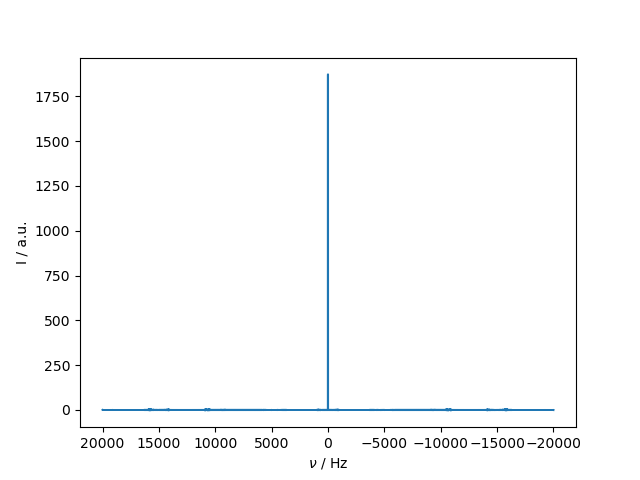

<AxesSubplot:xlabel='$\\nu$ / Hz', ylabel='I / a.u.'>

In [57]:
rho.plot(FT=True)

So why does this work? It is relatively straightforward: the state of the $^1$H spin is modulated from $+\langle I_z\rangle$ to $-\langle I_z\rangle$, faster than the evolution of the $^{13}$C spin under the H–C dipole coupling. We can monitor the $^1$H magnetization under the decoupling field to observe this.

In [8]:
# For 1H z-magnetization detection, for single crystallite
exHz=ex.copy()

ipwd=26
exHz.pwdavg=exHz.pwdavg[ipwd]
LHz=sl.Liouvillian(exHz)

seqHz=LHz.Sequence()
seqHz.add_channel('1H',t=[0,exHz.taur/8],v1=0)

rhoHz=sl.Rho(rho0='1Hz',detect='1Hz')

seqHz.add_channel('1H',t=[0,exHz.taur/8],v1=20000)
rhoHz=sl.Rho('1Hz','1Hz')
rhoHz.DetProp(seq=seqHz,n=100)

Prop: 8 steps per every 1 rotor period


Density Matrix/Detection Operator
rho0: 1Hz
detect[0]: 1Hz
Current time is 2500.000 microseconds
100 time points have been recorded


<IPython.core.display.Javascript object>


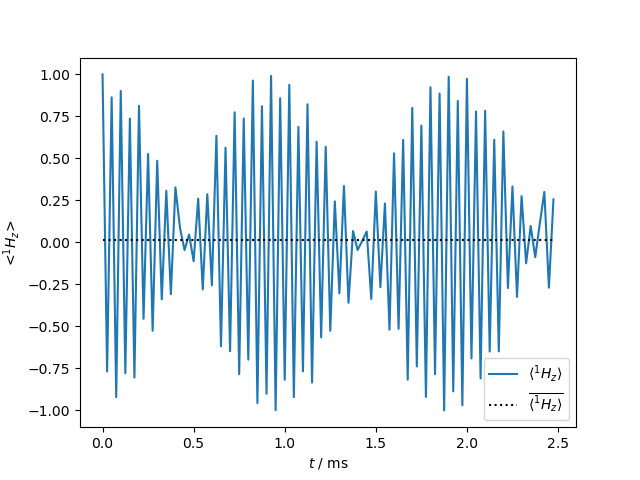

In [137]:
ax=plt.subplots()[1]
rhoHz.plot(ax=ax)
ax.plot(rhoHz.t_axis*1e3,np.ones(len(rhoHz.t_axis))*rhoHz.I[0].real.mean(),color='black',linestyle=':')
ax.legend((r'$\langle ^1H_z\rangle$',r'$\overline{\langle ^1H_z\rangle}$'),loc='lower right')

The oscillation is undersampled, but in any case, we see a relatively simple behavior, going between $\pm$1

We are already successful with just cw decoupling. However, what happens if there is some offset on the applied field?

In [138]:
seq.add_channel('1H',t=[0,ex.taur/8],v1=20000,voff=30000)
rho.clear()
rho.DetProp(seq,n=4096)

Prop: 8 steps per every 1 rotor period


Density Matrix/Detection Operator
rho0: 15Nx
detect[0]: 15Np
Current time is 102400.000 microseconds
4096 time points have been recorded


<IPython.core.display.Javascript object>


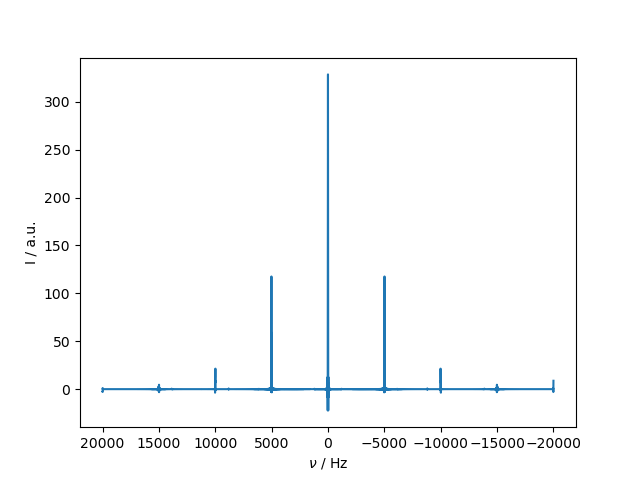

<AxesSubplot:xlabel='$\\nu$ / Hz', ylabel='I / a.u.'>

In [139]:
rho.plot(FT=True)

The effectiveness of our decoupling is strongly impacted. So what happens? If we follow $^1$H magnetization, we see that it no longer oscillates entirely from +1 to -1, such that the averaged couplings are no longer zero.

In [141]:
seqHz.add_channel('1H',t=[0,ex.taur/8],v1=20000,voff=30000)
rhoHz=sl.Rho(rho0='1Hz',detect='1Hz')
rhoHz.DetProp(seq=seqHz,n=100)

Prop: 8 steps per every 1 rotor period


Density Matrix/Detection Operator
rho0: 1Hz
detect[0]: 1Hz
Current time is 2500.000 microseconds
100 time points have been recorded


<IPython.core.display.Javascript object>


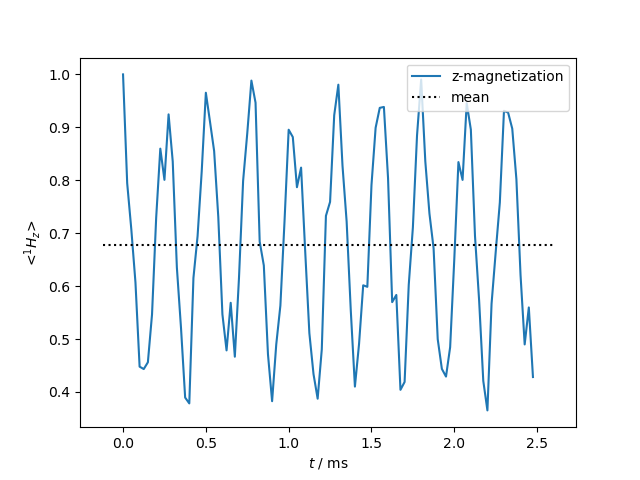

In [142]:
ax=rhoHz.plot()
ax.plot(ax.get_xlim(),rhoHz.I[0].mean().real*np.ones(2),color='black',linestyle=':')
ax.legend(('z-magnetization','mean'))

Of course, we can just increase the power to move the effective field back towards the z-axis, but ideally, we would have a more robust decoupling.

In [119]:
seq=L.Sequence()
seq.add_channel('1H',t=[0,ex.taur/8],v1=60000,voff=30000)
rho.clear()
rho.DetProp(seq=seq,n=4096)

Prop: 8 steps per every 1 rotor period


Density Matrix/Detection Operator
rho0: 15Nx
detect[0]: 15Np
Current time is 102400.000 microseconds
4096 time points have been recorded


<IPython.core.display.Javascript object>


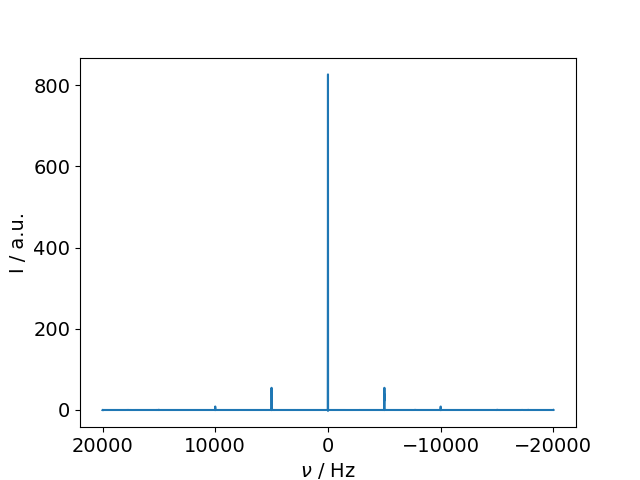

<AxesSubplot:xlabel='$\\nu$ / Hz', ylabel='I / a.u.'>

In [120]:
rho.plot(FT=True)

## Composite Pulse Decoupling
We start with the basic element of the WALTZ sequence (WALTZ-1), which we will apply at 60 kHz so that it fits into the rotor period.

<IPython.core.display.Javascript object>


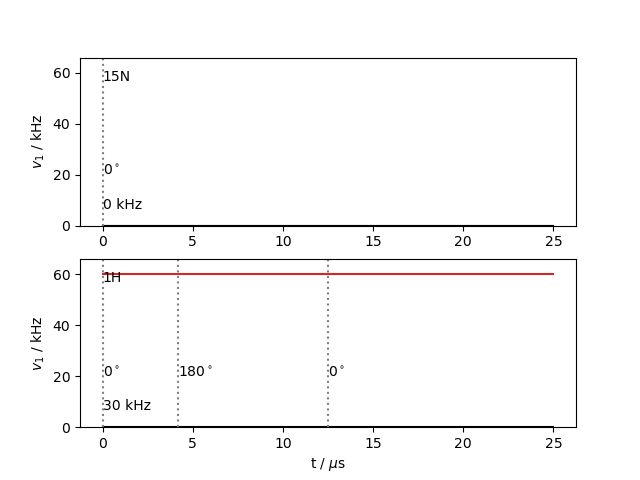

[<AxesSubplot:ylabel='$v_1$ / kHz'>,
 <AxesSubplot:xlabel='t / $\\mu$s', ylabel='$v_1$ / kHz'>]

In [71]:
v1=60000
dt=1/v1/4
seq=L.Sequence()
seq.add_channel('1H',t=[0,dt,3*dt,6*dt],v1=v1,phase=[0,np.pi,0,0],voff=30000)
seq.plot()

In [72]:
rho.clear()
rho.DetProp(seq=seq,n=4096)

Prop: 8 steps per every 1 rotor period


Density Matrix/Detection Operator
rho0: 15Nx
detect[0]: 15Np
Current time is 102400.000 microseconds
4096 time points have been recorded


<IPython.core.display.Javascript object>


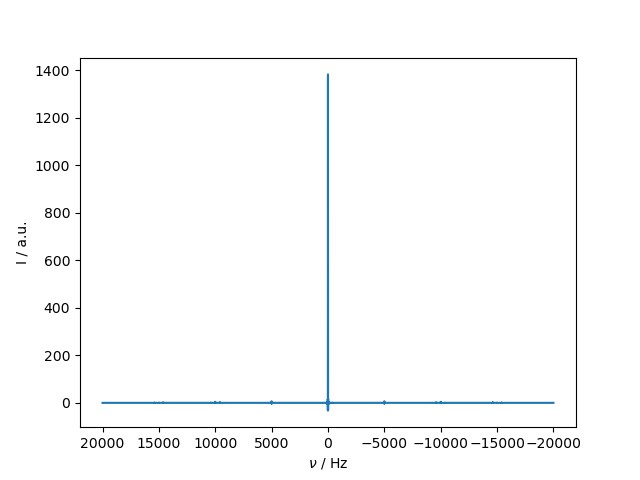

<AxesSubplot:xlabel='$\\nu$ / Hz', ylabel='I / a.u.'>

In [73]:
rho.plot(FT=True)

We can understand the improvement by checking the robustness of the WALTZ-4 composite pulse to offsets on the $^1$H channel

In [143]:
voff0=np.linspace(-50000,50000,11)
waltz=LHz.Sequence()
cw=LHz.Sequence()
Iwaltz=[]
Icw=[]
rhoHz=sl.Rho(rho0='1Hz',detect='1Hz')
for voff in voff0:
    waltz.add_channel('1H',t=[0,dt,3*dt,6*dt],v1=v1,phase=[0,np.pi,0,0],voff=voff)
    cw.add_channel('1H',t=[0,6*dt],v1=v1,voff=voff)
    rhoHz.clear()
    (waltz.U()*rhoHz)()
    Iwaltz.append(rhoHz.I[0][0].real)
    rhoHz.clear()
    (cw.U()*rhoHz)()
    Icw.append(rhoHz.I[0][0].real)

<IPython.core.display.Javascript object>


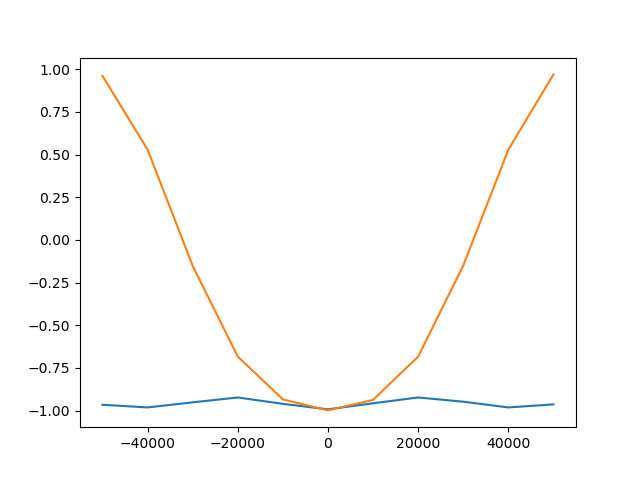

In [144]:
ax=plt.subplots()[1]
ax.plot(voff0,Iwaltz)
ax.plot(voff0,Icw)

What we have seen so far is that the key to effecive heteronuclear decoupling is effective inversion of the second spin (usually $^1$H) so that it samples equally above and below the z-axis.

Now we add another $^1$H spin, to see how this impacts the decoupling.

In [121]:
ex=sl.ExpSys(850,Nucs=['15N','1H','1H'],vr=5000,pwdavg=sl.PowderAvg(q=2),n_gamma=48)
ex.set_inter('dipole',delta=22000,i0=0,i1=1)
ex.set_inter('dipole',delta=50000,i0=1,i1=2,euler=[0,np.pi/3,0])
L=sl.Liouvillian(ex)

v1=60000
dt=1/v1/4
seq=L.Sequence()
seq.add_channel('1H',t=[0,dt,3*dt,6*dt],v1=v1,phase=[0,np.pi,0,0],voff=0)
# seq.add_channel('1H',t=[0,6*dt],v1=v1,voff=5000)

rho=sl.Rho(rho0='15Nx',detect='15Np')

In [122]:
rho.clear()
rho.DetProp(seq=seq,n=4096)

Prop: 8 steps per every 1 rotor period


Density Matrix/Detection Operator
rho0: 15Nx
detect[0]: 15Np
Current time is 102400.000 microseconds
4096 time points have been recorded


<IPython.core.display.Javascript object>


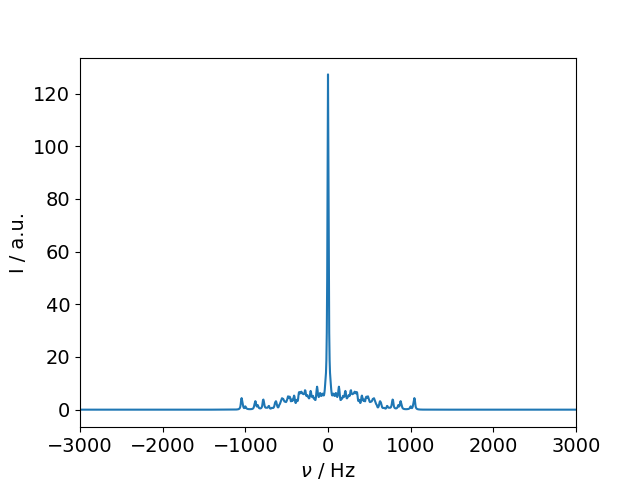

(-3000.0, 3000.0)

In [123]:
ax=plt.subplots()[1]
rho.plot(FT=True,apodize=True,ax=ax)
ax.set_xlim([-3000,3000])

We can also use the WALTZ-8 sequence:

<IPython.core.display.Javascript object>


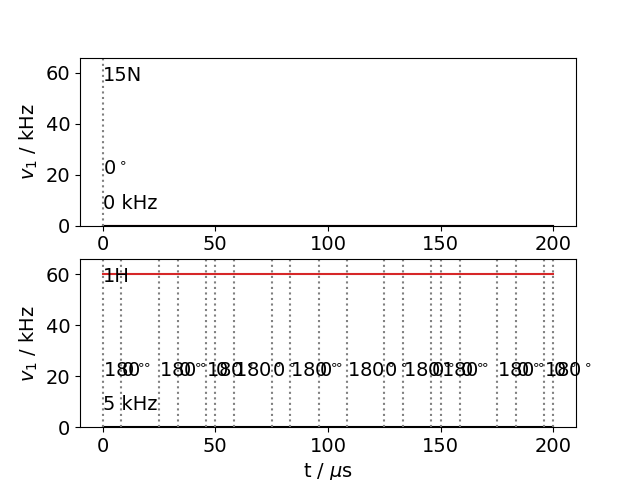

[<AxesSubplot:ylabel='$v_1$ / kHz'>,
 <AxesSubplot:xlabel='t / $\\mu$s', ylabel='$v_1$ / kHz'>]

In [69]:
n=[2,4,2,3,1,2,4,2,3,1,2,4,2,3,1,2,4,2,3,1]
ph=[1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0]

t=[0]
for n0 in n:t.append(t[-1]+n0*dt)
phase=np.pi*np.array(ph)

seq.add_channel('1H',t=t,v1=v1,phase=phase,voff=0)
seq.plot()

In [70]:
rho.clear()
rho.DetProp(seq=seq,n=512)

Density Matrix/Detection Operator
rho0: 15Nx
detect[0]: 15Np
Current time is 102400.000 microseconds
512 time points have been recorded


<IPython.core.display.Javascript object>


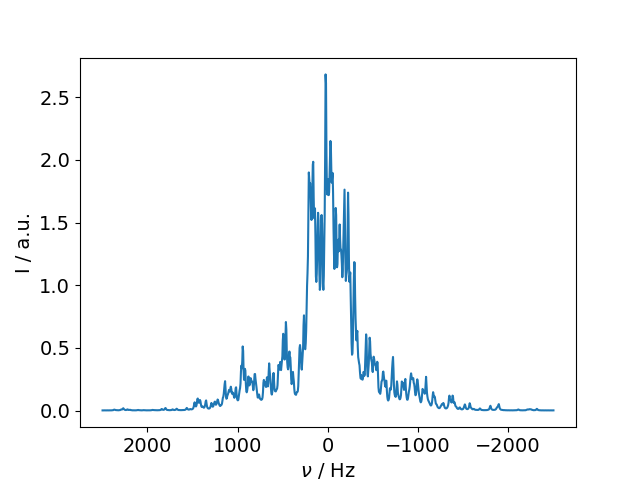

<AxesSubplot:xlabel='$\\nu$ / Hz', ylabel='I / a.u.'>

In [71]:
ax=plt.subplots()[1]
rho.plot(FT=True,apodize=True,ax=ax)
ax.set_xlim([-3000,3000])

In [75]:
exHz=ex.copy()
exHz.pwdavg=exHz.pwdavg[ipwd]
LHz=sl.Liouvillian(exHz)

seqHz=LHz.Sequence()
seqHz.add_channel('1H',t=t,v1=v1,phase=phase,voff=0)

rhoHz=sl.Rho(rho0='S1z',detect='S1z')

rhoHz.DetProp(seqHz,n=250)

Density Matrix/Detection Operator
rho0: S1z
detect[0]: S1z
Current time is 50000.000 microseconds
250 time points have been recorded


<IPython.core.display.Javascript object>


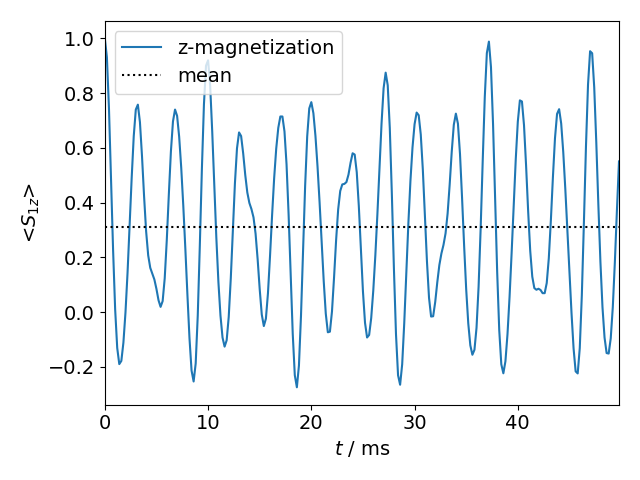

In [77]:
ax=rhoHz.plot()
ax.set_xlim([rhoHz.t_axis[0],rhoHz.t_axis[-1]*1e3])
ax.plot(ax.get_xlim(),rhoHz.I[0].real.mean()*np.ones(2),color='black',linestyle=':')
ax.legend(('z-magnetization','mean'))
ax.figure.tight_layout()

As one sees, the single spin no long has an average magnetization of zero, preventing its complete decoupling.

The failure of WALTZ in the face of strong H–H and H–C dipole couplings is not surprising, given that it is intended for solution-state NMR to remove J–couplings, and compensate for offsets, not strong H–H coupling.

Therefore, we investigate the performance of sequences intended for solid-state NMR decoupling.

## SPINAL

In [131]:
ex=sl.ExpSys(850,Nucs=['15N','1H','1H'],vr=5000,pwdavg=sl.PowderAvg(q=2),n_gamma=48)
ex.set_inter('dipole',delta=22000,i0=0,i1=1)
ex.set_inter('dipole',delta=50000,i0=1,i1=2,euler=[0,np.pi/3,0])
L=sl.Liouvillian(ex)



Q=[10,-10,15,-15,20,-20,15,-15]
Qb=[-10,10,-15,15,-20,20,-15,15]
phase=np.concatenate((Q,Qb,Qb,Q,Qb,Q,Q,Qb,[0]))*np.pi/180
# phase=np.concatenate((Q,Qb,[0]))*np.pi/180

dt=L.taur/64
v1=165/360/dt

t=dt*np.arange(len(phase))

seq=L.Sequence()
seq.add_channel('1H',t=t,v1=v1,phase=phase,voff=4000)

In [132]:
rho=sl.Rho('15Nx+S1z',['15Np','S1z'])
rho.DetProp(seq,n=512)

Density Matrix/Detection Operator
rho0: 15Nx+S1z
detect[0]: 15Np
detect[1]: S1z
Current time is 102400.000 microseconds
512 time points have been recorded


In [147]:
rho.Ipwd[:,1].mean(-1)

array([0.00120522+5.36266723e-16j, 0.00260446-2.05255565e-16j,
       0.00104913+2.48990205e-16j, 0.00169543+1.14546132e-16j,
       0.00199767+3.05183853e-16j, 0.00159547+6.20197524e-17j,
       0.00403175+3.35323403e-16j, 0.00214676+4.29337549e-16j,
       0.00330781-1.00765993e-15j, 0.00168136-3.74730764e-16j,
       0.00358045+2.59966270e-16j, 0.00325928+4.53402377e-16j,
       0.00333083-5.83097481e-16j, 0.00263424-3.09626965e-16j,
       0.00207004+8.93088881e-16j, 0.00678832-1.50235608e-15j,
       0.00140183+2.26693122e-16j, 0.00172911-4.11271765e-16j,
       0.0028574 +4.10246273e-16j, 0.0016543 +1.44195713e-16j,
       0.00237908+4.47436684e-16j, 0.0022343 -7.53481546e-16j,
       0.00110837-2.24010463e-16j, 0.00259048-1.30225502e-15j,
       0.00315872+1.85985565e-16j, 0.00250057-9.44126005e-16j,
       0.0033868 +3.37204663e-16j, 0.00176932-1.09332525e-16j,
       0.0022872 -1.48990554e-16j, 0.00181309+5.53087951e-16j,
       0.00258599+1.67233950e-16j, 0.00600216+5.3455571

<IPython.core.display.Javascript object>


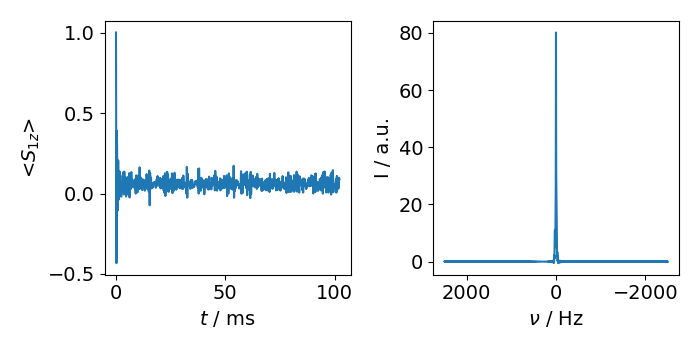

In [137]:
fig,ax=plt.subplots(1,2)
rho.plot(det_num=1,FT=False,ax=ax[0])
rho.plot(det_num=0,FT=True,ax=ax[1])
fig.set_size_inches([7,3.5])
fig.tight_layout()

In [141]:
seq=L.Sequence()
seq.add_channel('1H',t=[0,t[-1]],v1=v1,voff=4000)

rho.clear()
rho.DetProp(seq,n=512)

Density Matrix/Detection Operator
rho0: 15Nx+S1z
detect[0]: 15Np
detect[1]: S1z
Current time is 102400.000 microseconds
512 time points have been recorded


<IPython.core.display.Javascript object>


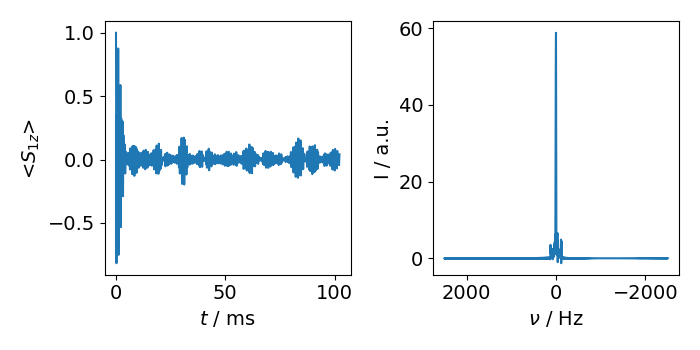

In [142]:
fig,ax=plt.subplots(1,2)
rho.plot(det_num=1,FT=False,ax=ax[0])
rho.plot(det_num=0,FT=True,ax=ax[1])
fig.set_size_inches([7,3.5])
fig.tight_layout()

In [35]:
exHz=ex.copy()
exHz.pwdavg=exHz.pwdavg
LHz=exHz.Liouvillian()

seqHz=LHz.Sequence()
seqHz.add_channel('1H',t=t,v1=v1,phase=phase)

UHz=seqHz.U().calcU()

rhoHz=sl.Rho('S1z','S1z')
rhoHz.DetProp(UHz,n=200)

Density Matrix/Detection Operator
rho0: S1z
detect[0]: S1z
Current time is 80000.000 microseconds
200 time points have been recorded


<IPython.core.display.Javascript object>


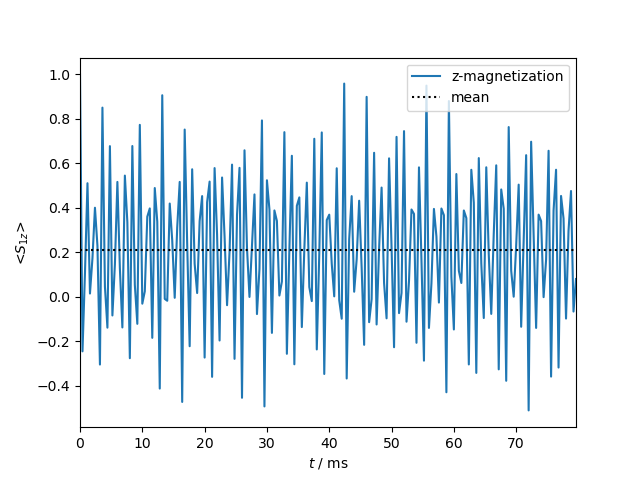

In [36]:
ax=rhoHz.plot()
ax.set_xlim([rhoHz.t_axis[0],rhoHz.t_axis[-1]*1e3])
ax.plot(ax.get_xlim(),rhoHz.I[0].real.mean()*np.ones(2),color='black',linestyle=':')
ax.legend(('z-magnetization','mean'))

## TPPM

In [98]:
ex=sl.ExpSys(850,Nucs=['15N','1H','1H'],vr=5000,pwdavg=sl.PowderAvg(q=2),n_gamma=48)
ex.set_inter('dipole',delta=22000,i0=0,i1=1)
ex.set_inter('dipole',delta=50000,i0=1,i1=2,euler=[0,np.pi/3,0])
L=sl.Liouvillian(ex)

phase=np.array([-7.5,7.5,0])*np.pi/180

dt=L.taur/32
v1=165/360/dt

t=dt*np.arange(len(phase))

seq=L.Sequence()
seq.add_channel('1H',t=t,v1=v1,phase=phase,voff=5000)

In [99]:
rho=sl.Rho('15Nx+S1z',['15Np','S1z'])
rho.DetProp(seq,n=1024)

Prop: 16 steps per every 1 rotor period


Density Matrix/Detection Operator
rho0: 15Nx+S1z
detect[0]: 15Np
detect[1]: S1z
Current time is 12800.000 microseconds
1024 time points have been recorded


<IPython.core.display.Javascript object>


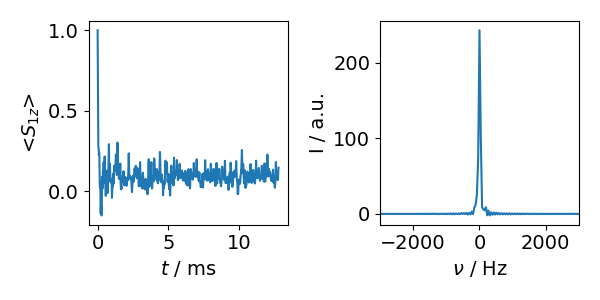

(-3000.0, 3000.0)

In [101]:
fig,ax=plt.subplots(1,2)
rho.plot(det_num=1,FT=False,ax=ax[0])
rho.plot(det_num=0,FT=True,ax=ax[1])
fig.set_size_inches([6,3])
fig.tight_layout()
ax[1].set_xlim([-3000,3000])

TPPM and other sequences work, in part, because they decouple the $^1$H from each other. We can demonstrate this by following the magnetization of one $^1$H under decoupling, with and without coupling to a second $^1$H

In [92]:
exHz=sl.ExpSys(850,Nucs=['15N','1H','1H'],vr=5000,pwdavg=sl.PowderAvg(q=2)[ipwd],n_gamma=48)
exHz.set_inter('dipole',delta=22000,i0=0,i1=1)
exHz.set_inter('dipole',delta=50000,i0=1,i1=2,euler=[0,np.pi/3,0])
LHz=sl.Liouvillian(exHz)

phase=np.array([-7.5,7.5,0])*np.pi/180

dt=LHz.taur/32
v1=165/360/dt

t=dt*np.arange(len(phase))

seqHz=LHz.Sequence()
seqHz.add_channel('1H',t=t,v1=v1,phase=phase)

rhoHz=sl.Rho('S1z','S1z')
rhoHz1=sl.Rho('S1z','S1z')

In [93]:
rhoHz.DetProp(seqHz,n=100)

exHz.set_inter('dipole',delta=0,i0=1,i1=2)
LHz=sl.Liouvillian(exHz)

seqHz=LHz.Sequence()
seqHz.add_channel('1H',t=t,v1=v1,phase=phase)

_=rhoHz1.DetProp(seqHz,n=100)

Prop: 16 steps per every 1 rotor period
Prop: 16 steps per every 1 rotor period


<IPython.core.display.Javascript object>


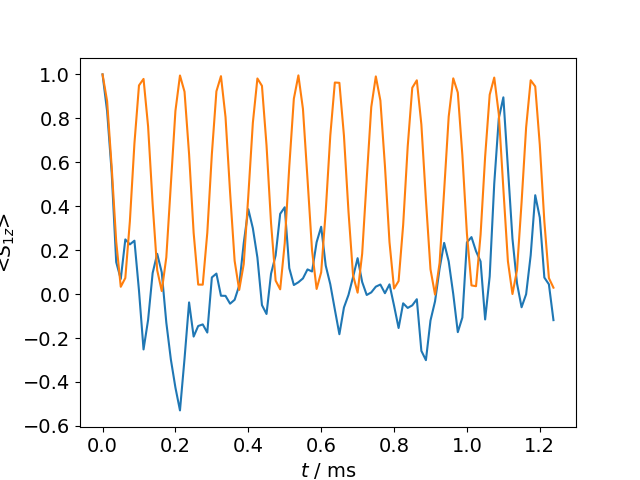

TypeError: 'Figure' object is not callable

In [96]:
ax=plt.subplots()[1]
rhoHz.plot(ax=ax)
rhoHz1.plot(ax=ax)
ax.figure.tight_layout()

In [47]:
exHz=sl.ExpSys(850,Nucs=['15N','1H','1H'],vr=5000,pwdavg=sl.PowderAvg(q=2)[ipwd],n_gamma=48)
exHz.set_inter('dipole',delta=22000,i0=0,i1=1)
exHz.set_inter('dipole',delta=50000,i0=1,i1=2,euler=[0,np.pi/3,0])
LHz=sl.Liouvillian(exHz)

phase=np.array([0,15])*np.pi/180

dt=LHz.taur/32
v1=165/360/dt

t=dt*np.arange(len(phase))

seqHz=LHz.Sequence()
seqHz.add_channel('1H',t=t,v1=v1)

rhoHz=sl.Rho('S1z','S1z')
rhoHz1=sl.Rho('S1z','S1z')

In [48]:
rhoHz.DetProp(seqHz,n=100)

exHz.set_inter('dipole',delta=0,i0=1,i1=2)
LHz=sl.Liouvillian(exHz)

seqHz=LHz.Sequence()
seqHz.add_channel('1H',t=t,v1=v1)

_=rhoHz1.DetProp(seqHz,n=100)

Prop: 32 steps per every 1 rotor period
Prop: 32 steps per every 1 rotor period


<IPython.core.display.Javascript object>


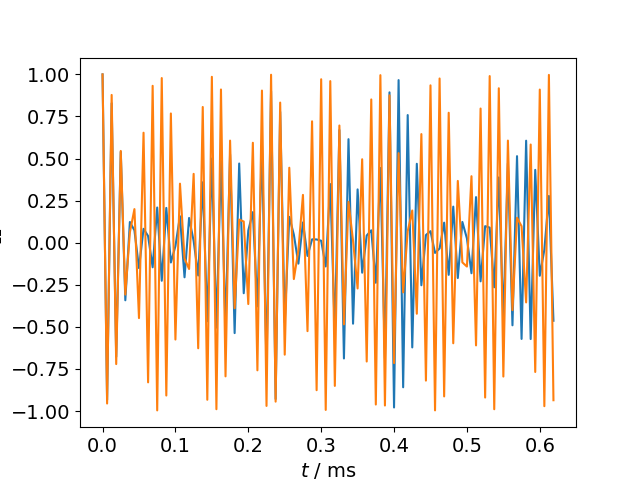

<AxesSubplot:xlabel='$t$ / ms', ylabel='<$S_{1z}$>'>

In [49]:
ax=plt.subplots()[1]
rhoHz.plot(ax=ax)
rhoHz1.plot(ax=ax)

<IPython.core.display.Javascript object>


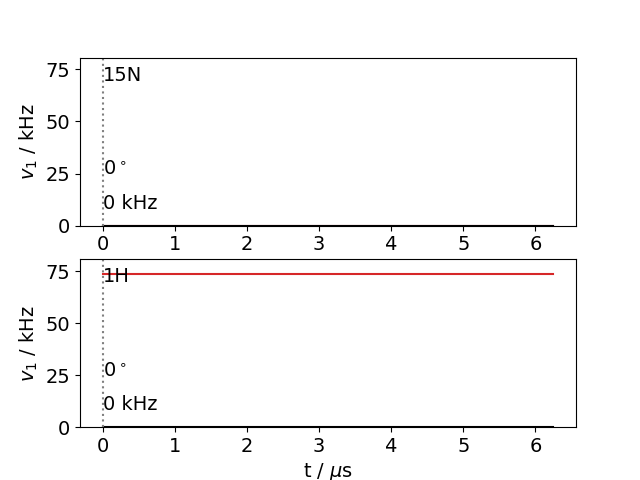

[<AxesSubplot:ylabel='$v_1$ / kHz'>,
 <AxesSubplot:xlabel='t / $\\mu$s', ylabel='$v_1$ / kHz'>]

In [50]:
seqHz.plot()

## Simulation with relaxation

In [205]:
ex=sl.ExpSys(600,Nucs=['13C','1H'],vr=10000,pwdavg=sl.PowderAvg(q=2))
ex.set_inter('dipole',delta=sl.Tools.dipole_coupling(.104,'1H','13C'),i0=0,i1=1)
ex.set_inter('CSA',delta=6,i=1)
L=sl.Liouvillian(ex)

# L.add_relax(Type='T1',i=1,T1=1/8000)
# L.add_relax(Type='T2',i=1,T2=1/8000)

seq=L.Sequence()
seq.add_channel('1H',t=[0,L.taur],v1=100000)

rho=sl.Rho('13Cx','13Cp')

rho.DetProp(seq,n=512)

Density Matrix/Detection Operator
rho0: 13Cx
detect[0]: 13Cp
Current time is 51200.000 microseconds
512 time points have been recorded


<IPython.core.display.Javascript object>


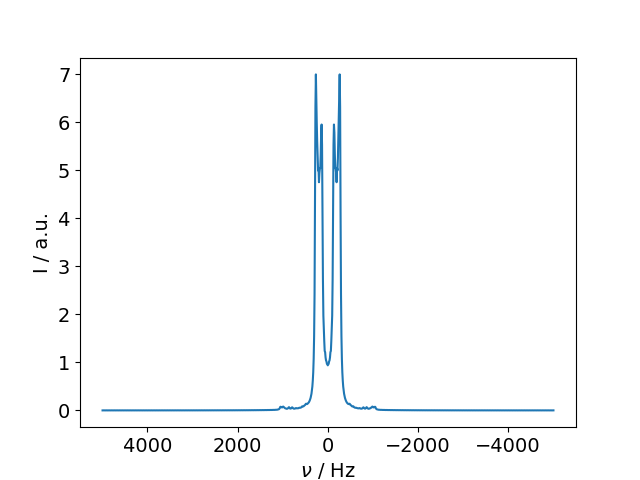

<AxesSubplot:xlabel='$\\nu$ / Hz', ylabel='I / a.u.'>

In [206]:
fig,ax=plt.subplots()
rho.plot(FT=True,apodize=True,ax=ax)
# ax.set_xlim([-2000,2000])

In [197]:
sl.Tools.dipole_coupling(.104,'1H','13C')

53714.37299847062